# Microsoft AI School - Classification

# Iris Species Classification

## imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Settings

In [72]:
plt.style.use("ggplot")

## Load iris dataset inlcuded in scikit-learn library

In [73]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

iris.keys()

feature = iris.data
feature_name = iris.feature_names

target = iris.target
target_name = iris.target_names

df_iris = pd.DataFrame(feature, columns = feature_name)
df_iris["species"] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Summary

In [74]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [75]:
df_iris["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

## Independent Variable Correlation Visualization

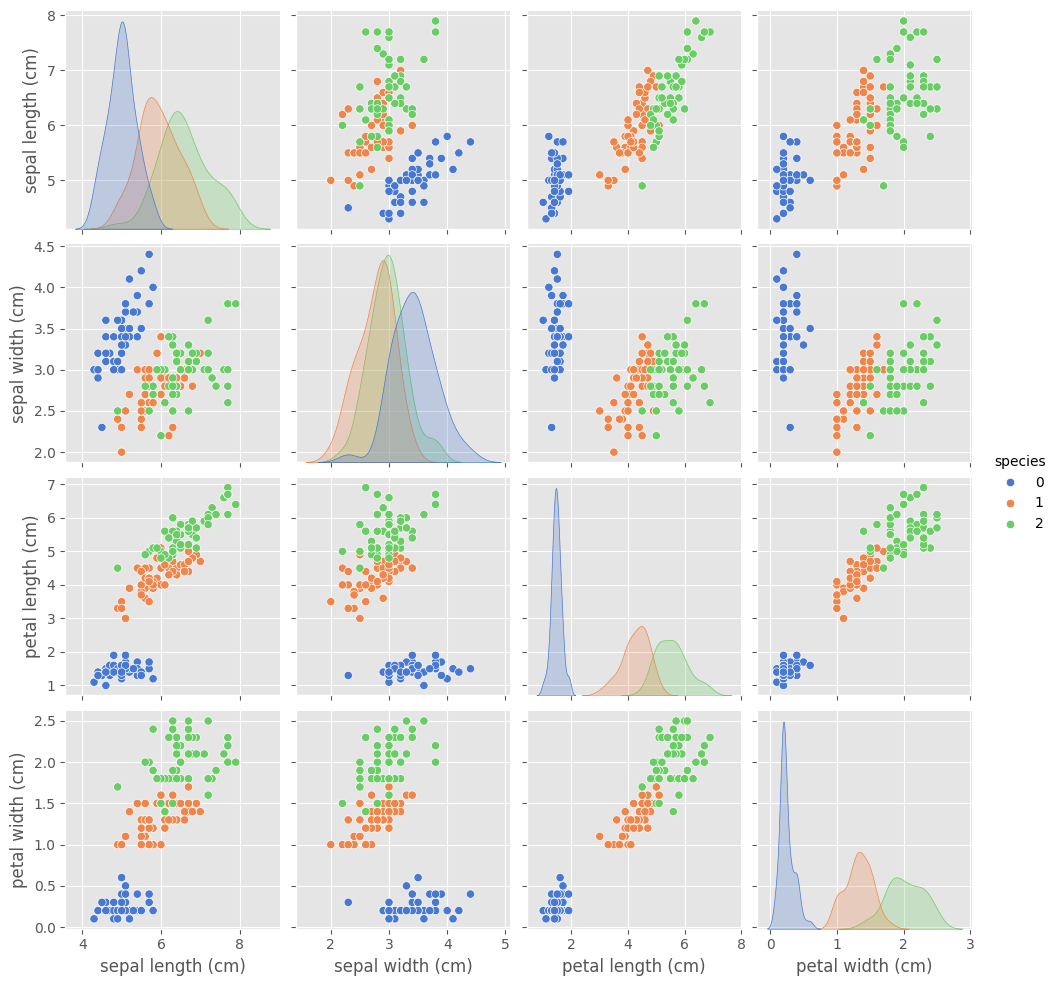

In [76]:
sns.pairplot(data = df_iris, hue = "species", palette = "muted");

## Declare variables for machine learning

In [77]:
X = feature
y = target

## Data Split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [79]:
pd.Series(y_train).value_counts()

0    40
2    40
1    40
Name: count, dtype: int64

## Model Development

In [80]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Model Evaluation

In [81]:
pred = model.predict(X_test)
print(f"Prediction:\t{pred}\nActual:\t\t{y_test}")

Prediction:	[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
Actual:		[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [82]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Model Accuracy: {accuracy_score(y_test, pred)}\n")
print(classification_report(y_test, pred))

Model Accuracy: 0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Visualizing Decition Tree Model

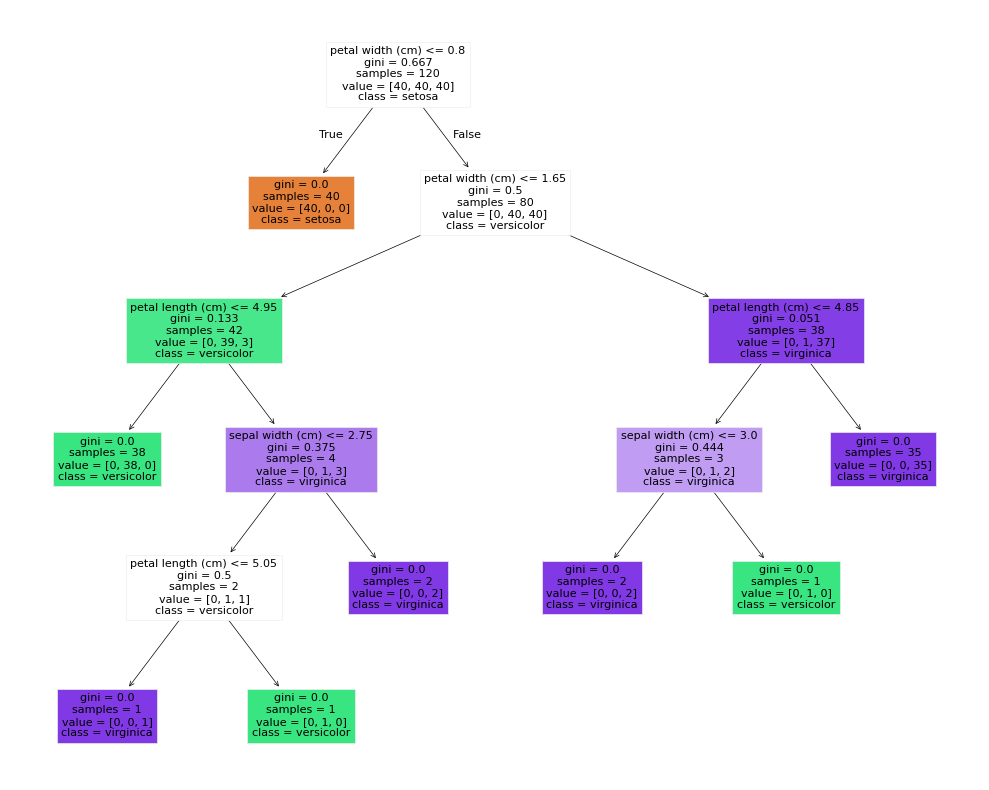

In [83]:
plt.figure(figsize = (10, 8))
from sklearn.tree import plot_tree

plot_tree(model, feature_names = feature_name, class_names = target_name, filled = True)
plt.tight_layout();

<Axes: >

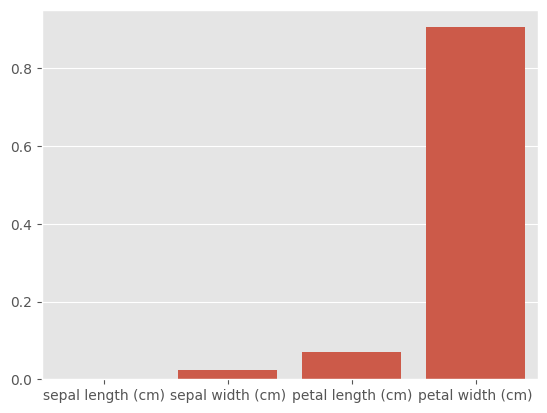

In [84]:
feature_importance = model.feature_importances_

sns.barplot(x = feature_name, y = feature_importance)

In [85]:
model.get_depth()

5

## Cross Validation

### K-Fold Cross Validation

In [86]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in kf.split(X = X_train):
    X_kf_train, y_kf_train = X_train[train_index], y_train[train_index]
    X_kf_test, y_kf_test = X_train[test_index], y_train[test_index]

    model.fit(X_kf_train, y_kf_train)

    y_kf_pred = model.predict(X_kf_test)

    print(f"Model Accuracy:\t{accuracy_score(y_kf_test, y_kf_pred)}")

Model Accuracy:	0.9583333333333334
Model Accuracy:	1.0
Model Accuracy:	0.9166666666666666
Model Accuracy:	0.9583333333333334
Model Accuracy:	0.9166666666666666


## Grid Search

In [88]:
from sklearn.model_selection import StratifiedKFold
model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits = 5, shuffle = True)

parameters = {"max_depth": [3, 4, 5],
              "min_samples_split": [2, 4]}

from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(model, param_grid = parameters, cv = kf, refit = True)

gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

In [91]:
display(pd.DataFrame(gscv.cv_results_))
print(f"Most Optimal Parameter: {gscv.best_params_}")
print(f"Higest Accuracy: {gscv.best_score_}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000569,0.000032,0.000411,0.000014,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.958333,0.958333,0.875,1.0,0.958333,0.950000,0.040825,1
1,0.000529,0.000003,0.000386,0.000002,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.958333,0.958333,0.875,1.0,0.958333,0.950000,0.040825,1
2,0.000530,0.000012,0.000388,0.000006,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.958333,0.958333,0.875,1.0,0.958333,0.950000,0.040825,1
3,0.000541,0.000043,0.000383,0.000006,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.958333,0.958333,0.875,1.0,0.958333,0.950000,0.040825,1
4,0.000532,0.000028,0.000378,0.000006,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.958333,0.958333,0.875,1.0,0.916667,0.941667,0.042492,6
5,0.000507,0.000003,0.000385,0.000027,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.958333,0.958333,0.875,1.0,0.958333,0.950000,0.040825,1


Most Optimal Parameter: {'max_depth': 3, 'min_samples_split': 2}
Higest Accuracy: 0.95


## Find the most optimal model

In [92]:
optimal_model = gscv.best_estimator_

pred = optimal_model.predict(X_test)

accuracy_score(y_test, pred)

0.9666666666666667

In [93]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
kf = StratifiedKFold(n_splits = 5, shuffle = True)

parameters = {"max_depth": [3, 4, 5],
              "min_samples_split": [2, 4]}

gscv_rf = GridSearchCV(model_rf, param_grid = parameters, cv = kf, refit = True)

gscv_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

In [94]:
display(pd.DataFrame(gscv_rf.cv_results_))
print(f"Most Optimal Parameter: {gscv_rf.best_params_}")
print(f"Higest Accuracy: {gscv_rf.best_score_}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084616,0.000665,0.004911,0.000050,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.916667,1.0,0.916667,0.916667,1.0,0.950000,0.040825,1
1,0.083980,0.000264,0.004858,0.000076,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.916667,1.0,0.875000,0.916667,1.0,0.941667,0.050000,3
2,0.084726,0.000312,0.004889,0.000118,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.916667,1.0,0.875000,0.916667,1.0,0.941667,0.050000,3
3,0.084828,0.000248,0.004870,0.000037,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.958333,1.0,0.875000,0.916667,1.0,0.950000,0.048591,1
4,0.085082,0.000527,0.004882,0.000042,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.916667,1.0,0.875000,0.916667,1.0,0.941667,0.050000,3
5,0.084368,0.000419,0.004821,0.000036,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.916667,1.0,0.875000,0.916667,1.0,0.941667,0.050000,3


Most Optimal Parameter: {'max_depth': 3, 'min_samples_split': 2}
Higest Accuracy: 0.95


In [95]:
optimal_model_rf = gscv_rf.best_estimator_

pred_rf = optimal_model.predict(X_test)

accuracy_score(y_test, pred_rf)

0.9666666666666667